# TE62MI - Algebre linéaire et réduction de dimension

## TP 1. Décomposition en Valeurs Singulières (SVD)

### Description
L'objectif de ce TP est d'étudier la Décomposition en Valeur Singulière (SVD) comme méthode de réduction de dimensionnalité, sur des données réelles.

### SVD (décomposition en valeurs singulières)

SVD est une méthode de décomposition matricielle. Soit X une matrice $nxd$. SVD est défini comme

\begin{equation}
    X = U \Sigma V^T
\end{equation}

où
- $U$ : la matrice $nxn$ a pour colonnes les vecteurs propres de $XX^T$
- $\Sigma$ : $nxd$ est une matrice diagonale avec les valeurs singulières de X dans la diagonale (= racines carrées de
$XX^T$ valeurs propres)
- $V$ : la matrice $dxd$ a pour colonnes les vecteurs propres de $X^TX$.

SVD permet une représentation exacte de n'importe quelle matrice, et facilite également l'élimination des moins importantes
parties de cette représentation afin de produire une représentation approximative avec n'importe quel nombre désiré
de dimensions - conduisant au concept d'approximation de rang inférieur d'une matrice. Une approximation de rang $r$ de $X$ est donnée par

\begin{equation}
    Y = U_{nxr}diag(\sigma_1... \sigma_r) V^T_{rxd}
\end{equation}

#### Comment effectuer une réduction de dimensionnalité avec SVD ?
Le but de la réduction de dimensionnalité est de trouver une approximation Y de X en utilisant r dimensions à la place
du $d$ d'origine, $r < d$. Cela peut être fait en utilisant les propriétés de SVD : $Y_{nxd} = U_{nxr}\Sigma_{rxr} V^T_{rxd}$

En pratique, le but n'est pas de reconstruire réellement la matrice d'origine, mais d'utiliser la matrice réduite
représentation de la dimensionnalité $U_{nxr}\Sigma_{rxr} V^T_{rxd}$ afin d'analyser les données.
La qualité de l'approximation de bas rang $Y$ d'une matrice $X$ peut être évaluée à l'aide de la norme de Frobenius
$||X-Y||_F$, où

\begin{equation}
    ||X||_F = \sqrt{\sum_{i=1}^n \sum_{j=1}^d | x_{ij}^2 } = \sqrt{\sum_{i=1}^{min(n,d)} \sigma_i^2}
\end{equation}

SVD donne la meilleure approximation de bas rang, celle qui minimise la norme de Frobenius $||X-Y||_F$.

### Tâches à effectuer dans ce TP

Compléter les champs de code manquant, entre `### TODO ###` et `### ENDO ###`
- Appliquer la décomposition SVD sur une autre matrice $X$ (`section 2`)
- Reconstruire une matrice originale (image) $X$ en utilisant les plus grandes valeurs singulières $k = \{10 ; 20; 50 ; 100 ; 200\}$ (`section 3`) 
- Quelle est l'erreur de chaque approximation/reconstruction? (`section 4`)
- Comparer (visuellement) ces approximations de l'image originale. Qu'observez-vous ? (`section 5`)
- Inspecter la distribution des valeurs singulières de $X$. (`section 5`)
- Tester avec une autre image / url de votre choix (`section 1`)

Tester vos résultats sur une autre image .png en noir et blanc de votre choix.

## 1. Load an image as an $nd$ data matrix

In [1]:
#!pip install scikit-image

In [2]:
# Load an image of Paul Valéry as an n x d matrix

from skimage.io import imread
#url = "https://upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Paul_Val%C3%A9ry_-_photo_Henri_Manuel.jpg/1200px-Paul_Val%C3%A9ry_-_photo_Henri_Manuel.jpg"
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Nina_Simone_1965.jpg/640px-Nina_Simone_1965.jpg"
X = imread(url)

# Convert RGB image to a gray / black & white image (n x d matrix)
if len(X.shape) == 3:
    X = X[:,:,0]

In [3]:
# Print X shape (n,d)
X.shape

(762, 640)

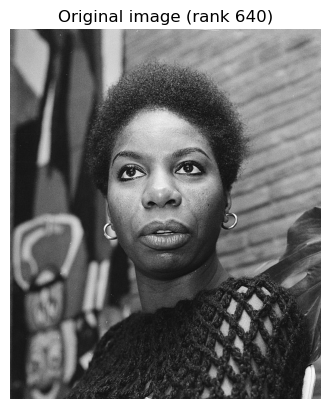

In [4]:
# Plot the original image
import matplotlib.pyplot as plt
plt.figure(1)
plt.imshow(X,cmap = "gray")
plt.title('Original image (rank {})'.format(min(X.shape)))
plt.axis('off')
plt.draw()

## 2. Implement SVD

In [5]:
# Perform SVD decomposition on the X matrix
import numpy as np

### TODO ###
U,S,V = np.linalg.svd(X)
### ENDO ###

In [6]:
assert U.shape == (X.shape[0], X.shape[0])
assert S.shape == (min(X.shape[0],X.shape[1]),)
assert V.shape == (X.shape[1], X.shape[1])

## 3. Low rank approximation matrix

In [7]:
# Reconstruct X (approximation) using the top k = [10, 20, 50, 100, 200] singular values

### TODO ###
X10 = np.dot(np.dot(U[:,:10],np.diag(S)[:10,:10]),V[:10,:])
X20 = np.dot(np.dot(U[:,:20],np.diag(S)[:20,:20]),V[:20,:])
X50 = np.dot(np.dot(U[:,:50],np.diag(S)[:50,:50]),V[:50,:])
X100 = np.dot(np.dot(U[:,:100],np.diag(S)[:100,:100]),V[:100,:])
X200 = np.dot(np.dot(U[:,:200],np.diag(S)[:200,:200]),V[:200,:])
### ENDO ###

In [8]:
assert X10.shape == (X.shape[0], X.shape[1])
assert X20.shape == (X.shape[0], X.shape[1])

## 4. Test your implementation

In [9]:
# Print error of approximation

### TODO ###
print ("Error for k=10 ", (np.linalg.norm(X-X10) / np.linalg.norm(X)))
print ("Error for k=20 ", (np.linalg.norm(X-X20) / np.linalg.norm(X))) 
print ("Error for k=50 ", (np.linalg.norm(X-X50) / np.linalg.norm(X)))
print ("Error for k=100 ", (np.linalg.norm(X-X100) / np.linalg.norm(X)))
print ("Error for k=200 ", (np.linalg.norm(X-X200) / np.linalg.norm(X)))
### ENDO ###

Error for k=10  0.19964825734341898
Error for k=20  0.14435556023317617
Error for k=50  0.09776483659616558
Error for k=100  0.07178702590254814
Error for k=200  0.04302561498065868


## 5. Analyse results

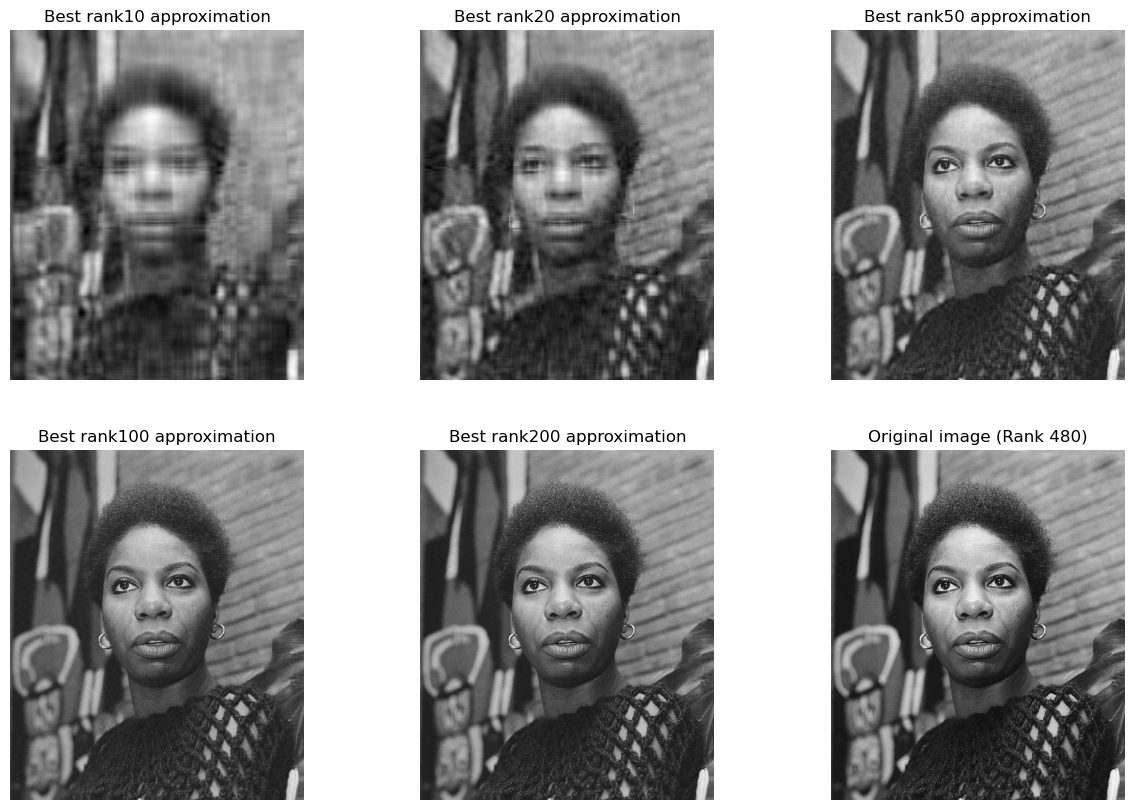

In [10]:
# Plot the optimal rank-k approximation for various values of k)
# Create a figure with 6 subfigures
plt.figure(2, figsize=(15,10))

# Rank 10 approximation
plt.subplot(231)
plt.imshow(X10,cmap = "gray")
plt.title('Best rank' + str(10) + ' approximation')
plt.axis('off')

# Rank 20 approximation
plt.subplot(232)
plt.imshow(X20,cmap = "gray")
plt.title('Best rank' + str(20) + ' approximation')
plt.axis('off')

# Rank 50 approximation
plt.subplot(233)
plt.imshow(X50,cmap = "gray")
plt.title('Best rank' + str(50) + ' approximation')
plt.axis('off')

# Rank 100 approximation
plt.subplot(234)
plt.imshow(X100,cmap = "gray")
plt.title('Best rank' + str(100) + ' approximation')
plt.axis('off')

# Rank 200 approximation
plt.subplot(235)
plt.imshow(X200,cmap = "gray")
plt.title('Best rank' + str(200) + ' approximation')
plt.axis('off')

# Original
plt.subplot(236)
plt.imshow(X,cmap = "gray")
plt.title('Original image (Rank 480)')
plt.axis('off')

plt.draw()

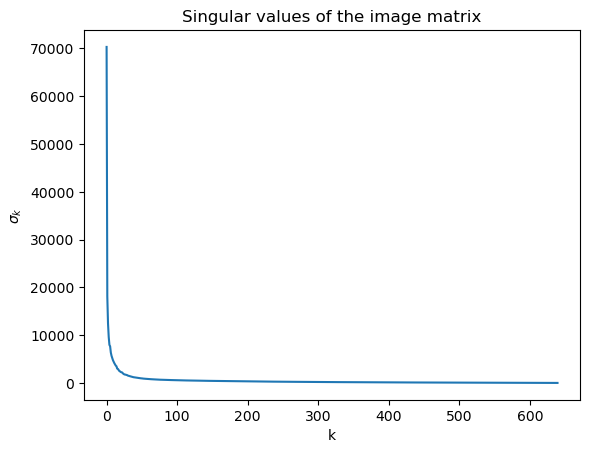

In [11]:
# Plot the singular values of X versus their rank k
plt.figure(3) 

### TODO ###
plt.plot(S)
### ENDO ###

plt.xlabel('k'), 
plt.ylabel(r'$\sigma_k$')
plt.title('Singular values of the image matrix')
plt.draw()

plt.show() 